In [1]:
# %matplotlib widget
from sklearn import datasets, manifold, mixture, metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import stats, linalg
import itertools
from math import ceil
from manifold_helper import fit_plot, gmm_results, get_true_labels, ari_results

In [2]:
n_samples = 500
n_neighbors = 10

In [3]:
x, y = datasets.make_s_curve( n_samples=n_samples, random_state=1 )

idx = y.argsort()
y.sort()
x = x[idx]

y = []
for i in range( n_samples ):
    if (i < n_samples / 2):
        y.append( 'purple' )
    else:
        y.append( 'blue' )

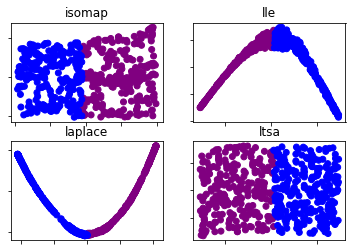

In [4]:
y_isomap, y_lle, y_laplace, y_ltsa = fit_plot( x, y, n_neighbors=n_neighbors, n_components=2 )

In [5]:
gmm = []
for i in range( 4 ):
    gmm.append( mixture.GaussianMixture( n_components=2, covariance_type='full' ) )
gmm_isomap = gmm[0].fit( y_isomap )
gmm_lle = gmm[1].fit( y_lle )
gmm_laplace = gmm[2].fit( y_laplace )
gmm_ltsa = gmm[3].fit( y_ltsa )  

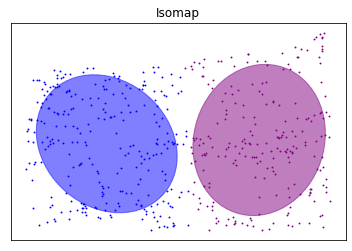

In [6]:
gmm_results( y_isomap, gmm_isomap.predict( y_isomap ), gmm_isomap.means_, gmm_isomap.covariances_, 0, 'Isomap' )

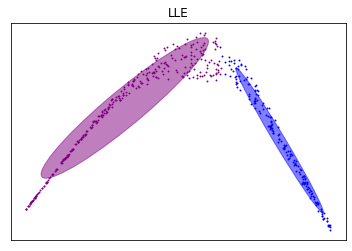

In [7]:
gmm_results( y_lle, gmm_lle.predict( y_lle ), gmm_lle.means_, gmm_lle.covariances_, 0, 'LLE' )

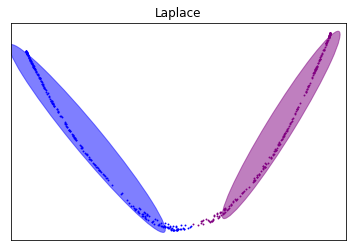

In [8]:
gmm_results( y_laplace, gmm_laplace.predict( y_laplace ), gmm_laplace.means_, gmm_laplace.covariances_, 0, 'Laplace' )

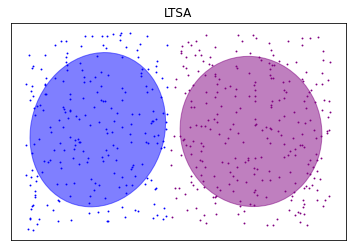

In [9]:
gmm_results( y_ltsa, gmm_ltsa.predict( y_ltsa ), gmm_ltsa.means_, gmm_ltsa.covariances_, 0, 'LTSA' )

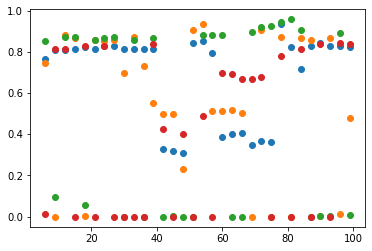

In [17]:
ari_results( x, 3, range( 5, 100 ), get_true_labels( y ) )